## Homework 3 
by Jordan Ehrman 
ehrmanj@uw.edu

# Question 1

Here, I will attempt to write up a Gram-Schmidt orthogonalization algorithm. That is, I will define a function that takes in a matrix and returns two matrices: a Q matrix, which is orthonormal, and an R matrix, which is upper triangular. In order to orthogonalize a given matrix, I will do the Gram-Schmidt orthogonalization, which I will attempt to do by hand in the following few cells. 

In [311]:
import copy

In [269]:
testmat = (np.random.rand(3,3) * 100).astype(int)

In [270]:
testmat

array([[16, 67, 70],
       [30, 43, 63],
       [74, 57, 17]])

In [279]:
np.linalg.cond(testmat)

9.857341183636134

## scratch space for finding out orthogonalization
Here I am going to try to do a Gram-Schmidt Orthogonalization without any fancy loops or generalization, just on the testmatrix I defined above. Then, I'll write up my function that I will do comparisons with. 

In [271]:
Q = np.zeros((3,3))
Q[:,0] = testmat.T[0]
print(Q)

[[16.  0.  0.]
 [30.  0.  0.]
 [74.  0.  0.]]


In [283]:
newvec = testmat.T[1] - (Q.T[0].dot(testmat.T[1]) / Q.T[0].dot(Q.T[0]))*Q.T[0]

In [284]:
newvec.dot(Q.T[0])

2.2737367544323206e-13

In [285]:
Q[:,1] = newvec

In [286]:
newervec = testmat.T[2] - (Q.T[0].dot(testmat.T[2]) / Q.T[0].dot(Q.T[0]))*Q.T[0] - (Q.T[1].dot(testmat.T[2]) / Q.T[1].dot(Q.T[1]))*Q.T[1]

In [287]:
newervec.dot(Q.T[1])

1.7053025658242404e-13

In [288]:
newervec.dot(Q.T[0])

2.2737367544323206e-13

In [294]:
Q[:,2] = newervec

In [295]:
Q.T.dot(Q)

array([[1.00000000e+00, 4.32345265e-17, 2.61938239e-15],
       [4.32345265e-17, 1.00000000e+00, 1.85286790e-15],
       [2.61938239e-15, 1.85286790e-15, 8.25268068e+02]])

so this matrix is orthogonal, but I need to also make it normal, so now I will normalize it. 

In [296]:
for i in range(3):
    Q[:,i] = Q[:,i] / np.linalg.norm(Q.T[i])

In [301]:
for i in range(3):
    print(np.linalg.norm(Q.T[i]))

1.0
1.0
1.0


In [302]:
Q.T.dot(Q)

array([[1.00000000e+00, 4.32345265e-17, 6.37683635e-17],
       [4.32345265e-17, 1.00000000e+00, 1.22878958e-16],
       [6.37683635e-17, 1.22878958e-16, 1.00000000e+00]])

So now Q is orthonormal! Exciting. Now I will look for matrix R, which I can find by taking the transpose of Q and dotting it with the original matrix. If I did everything right, R will be top-triangular, and multiplying Q by R will then give me back the original matrix. 

In [304]:
R = Q.T.dot(testmat)

In [307]:
R

array([[8.14370923e+01, 8.07985626e+01, 5.24085509e+01],
       [2.88657986e-15, 5.53045412e+01, 7.47400543e+01],
       [6.43929354e-15, 8.99280650e-15, 2.87274793e+01]])

In [306]:
Q.dot(R)

array([[16., 67., 70.],
       [30., 43., 63.],
       [74., 57., 17.]])

Cool! Looks like everything we did so far was right. Now I just need to take this formula, generalize it, and make it into a function. 
# making my function

In [361]:
def qrfactorization(A): 
    # getting dimensions of incoming matrix
    initmat = copy.deepcopy(A)
    m,n = A.shape
    # initializing Q
    Q = np.zeros((m,n)).astype(float)
    # setting first vector of q to be equal to first vector of A
    Q[:,0] = A.T[0]
    # now starting the orthogonalization process
    for i in range(1,n):
        tempinitvec = A.T[i].astype(float)
        for j in range (0,i):
            tempqvec = Q[:,j]
            projqamag = tempinitvec.dot(tempqvec) / tempqvec.dot(tempqvec)
            tempinitvec -= float(projqamag)*tempqvec.astype(float)
        Q[:,i] = tempinitvec
    # now starting the normalization process
    for i in range(n):
        Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])
    # now finding R
    R = Q.T.dot(initmat)
    # now returning 
    return(Q,R)

In [346]:
testq,testr = qrfactorization(testmat)

3   3
i: 1
j: 0
i: 2
j: 0
j: 1


In [351]:
testq

array([[ 0.19647067,  0.92443498, -0.32683214],
       [ 0.3683825 ,  0.23931531,  0.89834432],
       [ 0.90867684, -0.29689755, -0.29352723]])

In [352]:
testr

array([[8.14370923e+01, 8.07985626e+01, 5.24085509e+01],
       [3.44169138e-15, 5.53045412e+01, 7.47400543e+01],
       [6.43929354e-15, 8.99280650e-15, 2.87274793e+01]])

In [353]:
testq.dot(testq.T)

array([[ 1.00000000e+00,  1.20944934e-16, -6.19051912e-18],
       [ 1.20944934e-16,  1.00000000e+00,  2.65825221e-18],
       [-6.19051912e-18,  2.65825221e-18,  1.00000000e+00]])

In [354]:
testq.dot(testr)

array([[16., 67., 70.],
       [30., 43., 63.],
       [74., 57., 17.]])

So, my function gives an orthonormal q matrix and an uppder triangular R matrix that, when multiplied together, gives back the original matrix. That's a QR decomp! Let's try it out on some more testmatrices. 

In [376]:
for i in range(1,10):
    for j in range(1,10):
        testmat = np.random.rand(i,j)
        q,r = qrfactorization(testmat)
        print('is i greater than or equal to j?', i>=j)
        print('should be I:', np.allclose(q.T.dot(q), np.identity(j)))
        print('should be true:', np.allclose(r, np.triu(r)))
        print('should be true:', np.allclose(q.dot(r),testmat))

is i greater than or equal to j? True
should be I: True
should be true: True
should be true: True
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? False
should be I: False
should be true: False
should be true: False
is i greater than or equal to j? True
should be I: True
should be true: True
should be

/home/jorb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jorb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


By the look of this, it looks like my code works for square matrices and overdetermined matrices, but not underdetermined matrices. This makes sense, as there is no way to form an orthogonal matrix that is underdetermined. 

Now, I will take a 3x3 matrix with integer numbers and compare my algorithm to the householder reflector we made in class, as well as to the built-in qr algorithm in matlab. First, I will get a well conditioned 3x3 integer-valued matrix

In [378]:
testmat = (np.random.rand(3,3) * 100).astype(int)
print(testmat)
print(np.linalg.cond(testmat))

[[60 35 43]
 [17 60 47]
 [11 91 90]]
18.927925786803485


Now I will see how good of a qr decomposition I can get of it using my algorithm, matlab's algorithm, and the matlab algorithm using Dr. Kutz's code. 

In [382]:
q,r = qr_factorization(testmat)
np.square(np.subtract(q.dot(r), testmat)).mean()

5.609677548238306e-30

Dr. Kutz's code gives a slightly higher mean squared matrix, with an mse of ~1e-27. 

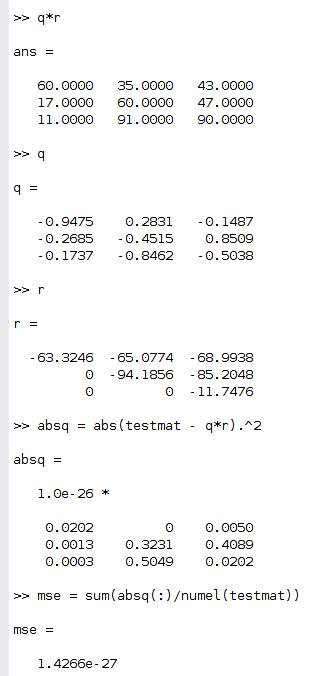

And the in-house qr factorization gave a mean square error of ~1e-28
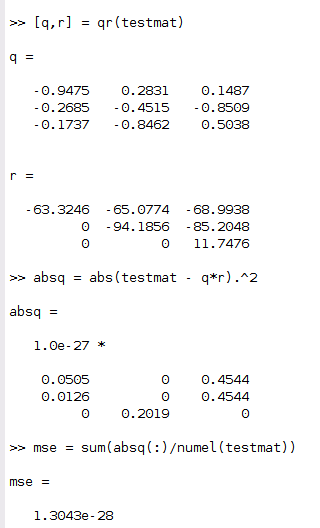

Now, I will try again with an ill conditioned matrix. 

In [397]:
testmat = (np.random.rand(3,2) * 1000000000000).astype(int)
testmat = np.c_[testmat,testmat.T[0] + np.array([1,1,1])]
print(np.linalg.cond(testmat))
testmat

16064183417210.48


array([[945860266690, 969986701829, 945860266691],
       [836878523018, 299216303152, 836878523019],
       [641096252791, 259825349062, 641096252792]])

In [399]:
q,r = qr_factorization(testmat)
mean_squared_error(q.dot(r),testmat)

1.655684577094184e-09

So my algorithm gives an mse of ~1e-9. Testing Dr. Kutz's on the same matrix gives an mse of ~1e-7. 
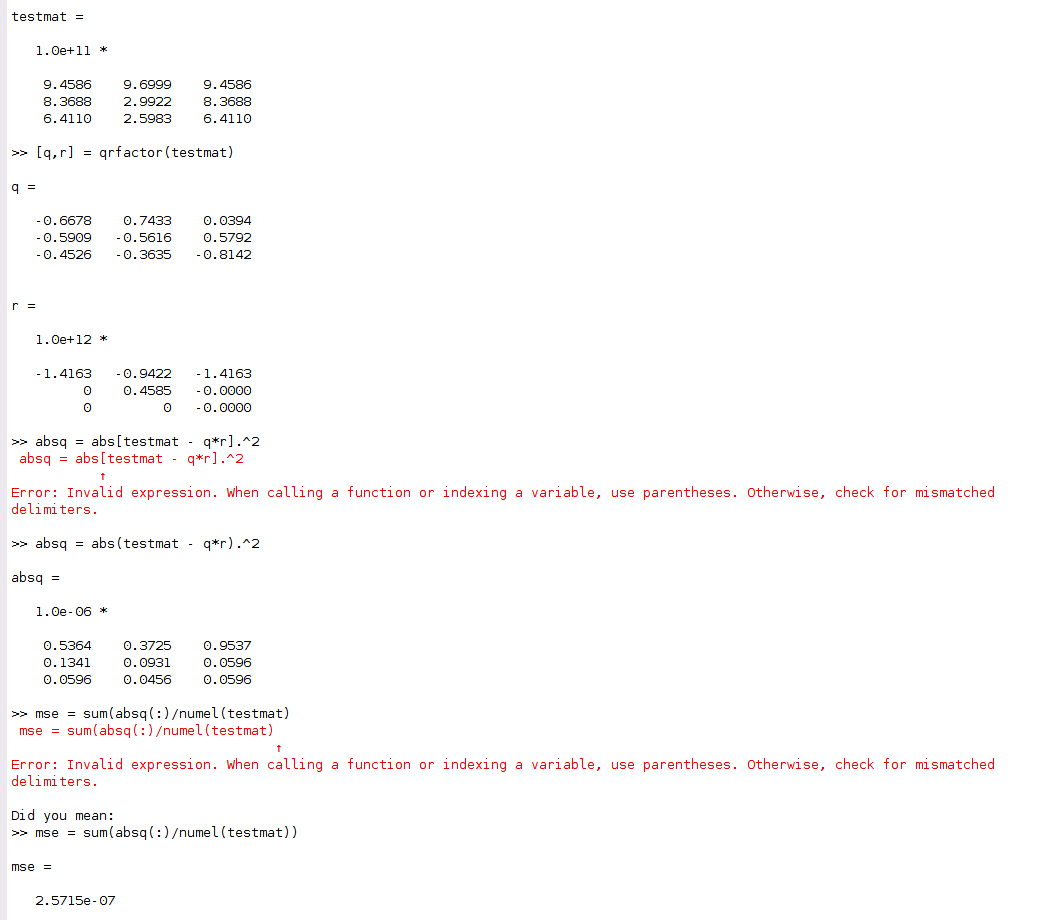

and the in-house matlab qr gives an error also on the order of magnitude of 1e-7. 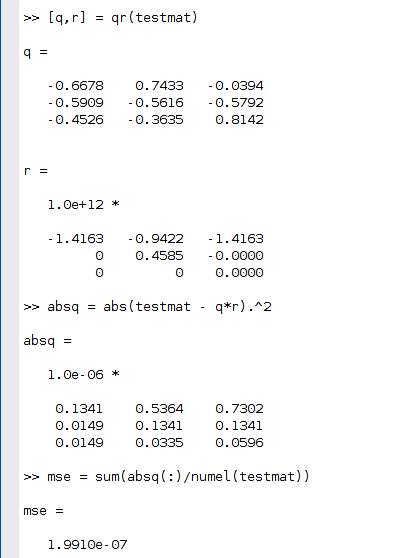

Therefore, for both the well conditioned and ill conditioned matrices that we tested, the Gram Schmidt method led to smaller errors than the other two methods did. That being said, it is worth noting that the differences in error between the different methods was small compared to the differences in error each method experienced between ill and well conditioned matrices. 

# Question 2
The coding part of this question is going to be quick -- First, I am going to generate a list of x values in the required range and with the required step size. Then, I am going to define two functions: one that generates the corresponding y values using the expanded polynomial form, and one that generates the corresponding x values using the condensed polynomial form. Finally, I will plot y vs x for the expanded polynomial y values, and I will ply y vs x for the condensed polynomial y values. In theory, the resulting plots should be the same, but it is possible that the two methods lead to differences in precision, rounding errors, etc, that will make the two plots look different. 

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# generating x val list
xlist = np.arange(1.920,2.080,0.001)

In [35]:
def findyexp(xlist): 
    # generating y val list expanded form 
    ylist = []
    for x in xlist: 
        y = x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512
        ylist.append(y)
    return ylist

In [36]:
def findycond(xlist):
    # generating y val list condensed form 
    ylist = []
    for x in xlist: 
        y = (x-2)**9
        ylist.append(y)
    return ylist

In [30]:
ylistexp = findyexp(xlist)

In [33]:
ylistcond = findycond(xlist)

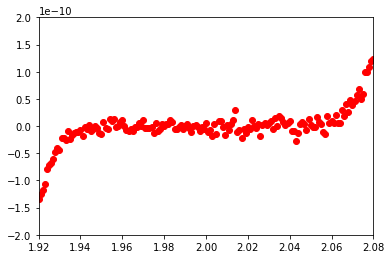

In [37]:
# plotting y vs x for expanded form y values
plt.plot(xlist, ylistexp, 'ro')
plt.axis([1.920, 2.080, -2*10**-10, 2*10**-10])
plt.show()

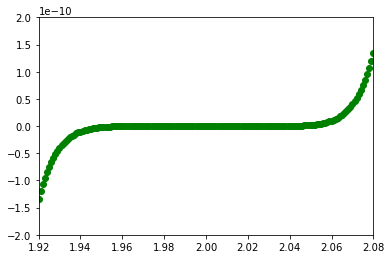

In [39]:
# generating y vs x for condensed form y values
plt.plot(xlist, ylistcond, 'go')
plt.axis([1.920, 2.080, -2*10**-10, 2*10**-10])
plt.show()

As can be seen from the previous two graphs, the two plots look different. When using the expanded form of the polynomial, the general form of the graph can be seen, but dots seem to appear scattered about the intended function. When using the condensed form of the polynomial, the graph appears much cleaner, and follows the intended form of the graph seemingly exactly. This is likely due to the number of digits the computer stores for each number. When the polynomial is in expanded form, the computer may compute each term of the polynomial separately, each time storing only some of the digits. When the polynomial is in condensed form, the computer will only store one value (x-2) before performing the exponent, and (x-2) will not have very many digits since our step sizes yield numbers with four digits. So, while the rounding errors of each term in the expanded form will compound when summed, the rounding errors in the condensed form will be consistent, as the only rounding that occurs in the condensed form will occur after the exponentiation. 

# Question 3
In order to answer this question, I need to generate an mxn matrix in which m = n+1. That way, once I add a column, the matrix will be square, and a determinant can be taken. 

In [41]:
def randmat(m):
    # creates random matrix with dimensions(m, m-1)
    randommat = np.random.rand(m,m-1)
    return randommat

In [52]:
# generating four random matrices with dim (m, m-1) of increasing m
matrix2 = randmat(2)
matrix20 = randmat(20)
matrix200 = randmat(200)
matrix2000 = randmat(2000)

now I'm going to check the condition numbers of a few

In [53]:
np.linalg.cond(matrix2)

1.0

In [54]:
np.linalg.cond(matrix20)

190.8807021381563

In [55]:
np.linalg.cond(matrix200)

6023.181781141914

In [56]:
np.linalg.cond(matrix2000)

111511.43669810078

It seems that the condition number generally increases with size. If I wanted, I could plot the correlation. In fact, I will. 

In [67]:
condnums = []
for i in range(10,4000,10):
    tempmat = randmat(i)
    condnums.append(np.linalg.cond(tempmat))
    print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

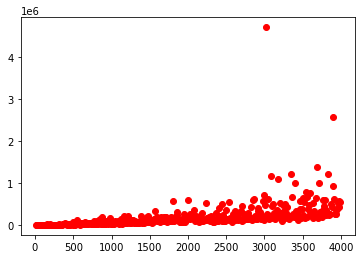

In [68]:
plt.plot(range(10,4000,10), condnums, 'ro')

As can be seen from this plot, an average condition number will generally increase as the dimensions of the matrix increases, with the smallest condition numbers seen at small matrices being around 1, and with the smallest condition numbers seen at matrices with dim(3800,3799) being around 3e5. Furthermore, very high condition number outliers also seem to increase as the size of the matrix increases. 

Now I will take a testmatrix and perform part b of the problem. 

In [85]:
testmat = np.random.rand(40,39)

In [106]:
testmat.T[0]

array([0.99385871, 0.97307832, 0.94765585, 0.31210176, 0.0627464 ,
       0.88157215, 0.45620546, 0.6678209 , 0.6367134 , 0.1677607 ,
       0.47591151, 0.06771415, 0.12785087, 0.65482783, 0.98973549,
       0.11024744, 0.56217764, 0.82745239, 0.22731252, 0.00436367,
       0.70587144, 0.3139596 , 0.27538869, 0.14772881, 0.32963691,
       0.80113887, 0.07539287, 0.11087652, 0.28781655, 0.28959495,
       0.44284099, 0.35950422, 0.52492959, 0.86872835, 0.23028131,
       0.24507356, 0.17468633, 0.85039569, 0.60908207, 0.15819385])

In [138]:
appended_testmat = np.c_[testmat,testmat.T[0]]

In [139]:
appended_testmat

array([[0.99385871, 0.14328575, 0.7638757 , ..., 0.9838614 , 0.11996336,
        0.99385871],
       [0.97307832, 0.49091033, 0.40840927, ..., 0.93047197, 0.74839424,
        0.97307832],
       [0.94765585, 0.93518126, 0.2806263 , ..., 0.33652531, 0.77037998,
        0.94765585],
       ...,
       [0.85039569, 0.44312434, 0.69474727, ..., 0.63563206, 0.97450749,
        0.85039569],
       [0.60908207, 0.41109721, 0.76367101, ..., 0.81539071, 0.33250557,
        0.60908207],
       [0.15819385, 0.9907046 , 0.75310986, ..., 0.06156909, 0.33364963,
        0.15819385]])

In [140]:
np.linalg.cond(testmat)

353.9223225450106

In [141]:
np.linalg.cond(appended_testmat)

5.222629382672979e+16

In [142]:
np.linalg.det(appended_testmat)

-6.470490169745501e-14

So, when the first column is appended to the end of the matrix, the condition number shoots up to very high, meaning that we have an ill-conditioned matrix. Taking the determinant of the new matrix shows that the determinant is basically zero, given computer accuracy. The original matrix cannot have a determinant, as it is not square. The important takeaway is that the condition number becomes very high when two columns of a matrix are identical. 

Now, I will add noise to the column vector that I added. I predict that this will make the condition number go down, and the determinant go up. 

In [143]:
vec = testmat.T[0]

In [144]:
np.shape(vec)

(40,)

In [145]:
noisevec = np.random.rand(40)

I will start with a very small magnitude of noise, and see how increasing the noise changes the condition number and determinant of the resulting matrix. I predict that determinant will go up and condition number will go down as the magnitude of noise approaches the max magnitude of each number of the vector, 1. 

In [161]:
noisyvec0 = vec + 0.0001*noisevec
noisyvec1 = vec + 0.001*noisevec
noisyvec2 = vec + 0.01*noisevec
noisyvec3 = vec + 0.1*noisevec

In [162]:
appended_testmatn0 = np.c_[testmat,noisyvec0]
appended_testmatn1 = np.c_[testmat,noisyvec1]
appended_testmatn2 = np.c_[testmat,noisyvec2]
appended_testmatn3 = np.c_[testmat,noisyvec3]

In [163]:
print(np.linalg.cond(appended_testmatn0))
print(np.linalg.cond(appended_testmatn1))
print(np.linalg.cond(appended_testmatn2))
print(np.linalg.cond(appended_testmatn3))

85674930.47015965
8569546.318046518
859246.8779316718
90517.78019588972


In [164]:
print(np.linalg.det(appended_testmatn0))
print(np.linalg.det(appended_testmatn1))
print(np.linalg.det(appended_testmatn2))
print(np.linalg.det(appended_testmatn3))

0.0003567098871484657
0.0035670988721943236
0.035670988721735186
0.35670988721630864


As can be seen, the condition number seems to decrease by approximately an order of magnitude for each order of magnitude the noise in the appended column increases by. Likewise, the determinant seems to increase by an approximately an order of magnitude for each order of magnitude the noise in the appended column increases by. This upholds the hypothesis that adding noise into the duplicated column will decrease the condition number and increase the determinant. 